# Import Library

In [1]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from sklearn import clone
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


# Soal

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan.
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dalam sebuah repositori Git (misalnya, di GitHub atau GitLab) dan kirimkan tautannya kepada kami.
4. Sebelum di kumpulkan, kode **WAJIB** dijalankan.

## Deskripsi Dataset

Dataset yang akan dipakai pada soal ini adalah dataset [Bank Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn) dengan sedikit modifikasi. Silahkan klik link tersebut untuk mengetahui penjelasan fitur-fiturnya.

Target variable pada dataset ini adalah `Exited`. Jumlah customer yang tidak meninggalkan bank (`Exited=0`) adalah 7962, sedangkan jumlah customer yang meninggalkan bank (`Exited=1`) adalah 159. Ini membuat dataset menjadi imbalance dan anda akan menangani kasus imbalance data tersebut.

In [3]:
df=pd.read_csv('Customer-Churn-Records-v2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8121 entries, 0 to 8120
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8121 non-null   int64  
 1   Geography           8121 non-null   object 
 2   Gender              8121 non-null   object 
 3   Age                 8121 non-null   int64  
 4   Tenure              8121 non-null   int64  
 5   Balance             8121 non-null   float64
 6   NumOfProducts       8121 non-null   int64  
 7   HasCrCard           8121 non-null   int64  
 8   IsActiveMember      8121 non-null   int64  
 9   EstimatedSalary     8121 non-null   float64
 10  Exited              8121 non-null   int64  
 11  Complain            8121 non-null   int64  
 12  Satisfaction Score  8121 non-null   int64  
 13  Card Type           8121 non-null   object 
 14  Point Earned        8121 non-null   int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 951.8

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,757,Germany,Female,34,9,101861.36,2,0,0,187011.96,0,0,5,PLATINUM,903
1,644,France,Male,33,8,0.00,2,1,1,155294.17,0,0,5,SILVER,813
2,655,Spain,Female,56,5,0.00,2,1,1,41782.70,0,0,2,PLATINUM,979
3,710,Spain,Female,36,8,0.00,2,0,0,83206.19,0,0,3,SILVER,636
4,684,Spain,Female,31,8,0.00,2,1,0,188637.05,0,0,4,SILVER,515


In [6]:
df['Exited'].value_counts()

,count
Exited,
0,7962
1,159


## 1. Imbalanced dataset

a) Buatlah sebuah dataset baru yang terdiri dari kolom `EstimatedSalary` dan kolom `Balance` sebagai fitur-fiturnya (X), dan kolom `Exited` sebagai target (y).

In [7]:
X = df[['EstimatedSalary', 'Balance']]
y = df['Exited']

b) Hitung jumlah masing-masing target (Hint: Counter).

In [8]:
target_counts = Counter(y)

print(f"Jumlah kelas 0: {target_counts[0]}")
print(f"Jumlah kelas 1: {target_counts[1]}")

Jumlah kelas 0: 7962
Jumlah kelas 1: 159


c) Visualisasikan dataset pada soal (1a) dengan scatter plot. Berikan warna yang berbeda untuk setiap kelasnya

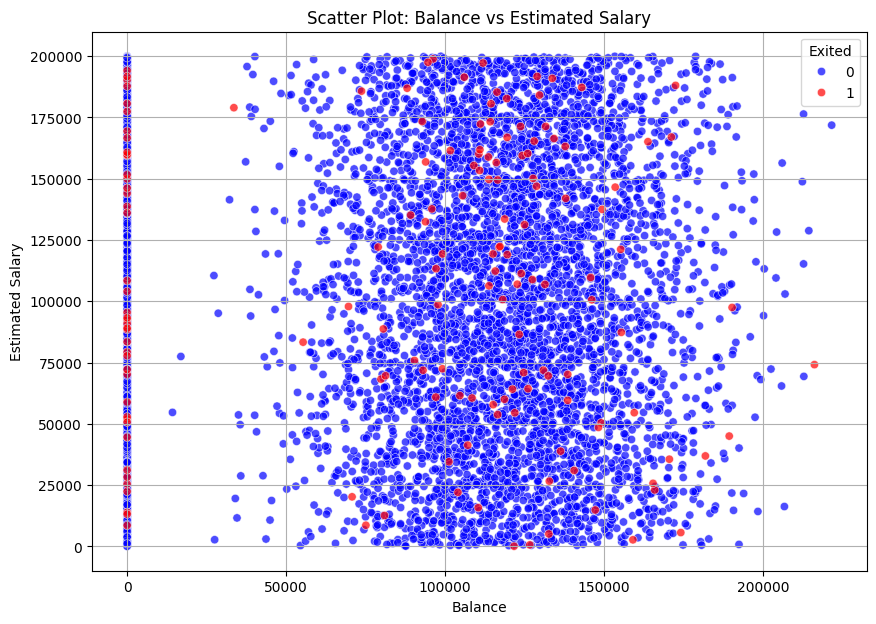

In [9]:
plt.figure(figsize=(10, 7))

sns.scatterplot(
    x='Balance',
    y='EstimatedSalary',
    hue='Exited',
    data=df,
    palette=['blue', 'red'],
    alpha=0.7
)

plt.title('Scatter Plot: Balance vs Estimated Salary')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()

d) Lengkapilah fungsi di bawah ini untuk melakukan oversampling pada setiap fold ketika melakukan cross validation pada suatu model menggunakan StratifiedKFold dengan k=5, shuffle=True, dan random_state=42. Tampilkan juga rata-rata skor accuracy, f1 macro, precision macro, dan recall macro.

Jalankan fungsi tersebut dengan menggunakan:
- DecisionTreeClassifier, dengan random_state=42
- Teknik oversampling RandomOversampler, dengan random_state=42
- X dan y yang didefinisikan pada soal (1a)

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [10]:
def train_and_evaluate_with_oversampling(model, X, y, resample_method):
    # TODO: Gunakan StratifiedK-fold biasa (Ubah None menjadi jawaban)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # TODO: Simpan hasil skor metrik setiap iterasi pada sebuah list
    accuracy_list = []
    f1_list = []
    precision_list = []
    recall_list = []

    # Convert X and y to numpy arrays for easier indexing with integer arrays
    X_np = X.values
    y_np = y.values

    # Iterasi untuk membagi fold mana yang menjadi training dan validation test dataset
    for fold, (train_index, test_index) in enumerate(skf.split(X_np, y_np), 1):
        X_train = X_np[train_index]
        y_train = y_np[train_index]
        X_test = X_np[test_index]
        y_test = y_np[test_index]

        # TODO: Lakukan fit resample dari menggunakan variabel resample_method di parameter method ini (Ubah None menjadi jawaban)
        X_train_sampled, y_train_sampled = resample_method.fit_resample(X_train, y_train)

        model_clone = clone(model) # Cloning model untuk membuat model harus dilatih lagi untuk memprediksi di luar method ini

        # TODO: Lakukan fitting model dari hasil clone model dengan X dan y dataset yang sudah diresample
        model_clone.fit(X_train_sampled, y_train_sampled)

        # TODO: Prediksi kelas kategori menggunakan model yang telah dilatih di atas dengan menggunakan validation test dataset (Ubah None menjadi jawaban)
        y_pred = model_clone.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")

        # TODO: Tambahkan hasil skor metrik ke dalam list yang bersesuaian
        accuracy_list.append(accuracy)
        f1_list.append(f1)
        precision_list.append(precision)
        recall_list.append(recall)

    # TODO: Hitung dan tampilkan mean dari setiap list skor metrik
    # Notes: ganti None dengan nama variabel list masing - masing metrik

    print("Mean scores across all folds:")
    print(f'Mean Accuracy: {np.mean(accuracy_list):.4f}')
    print(f'Mean F1-score (macro): {np.mean(f1_list):.4f}')
    print(f'Mean Precision (macro): {np.mean(precision_list):.4f}')
    print(f'Mean Recall (macro): {np.mean(recall_list):.4f}')

# Inisialisasi model dan metode resampling
dt = DecisionTreeClassifier(random_state=42)
ros_resampler = RandomOverSampler(random_state=42)

print("Mengevaluasi model...")
train_and_evaluate_with_oversampling(
    model=dt,
    X=X,
    y=y,
    resample_method=ros_resampler
)

Mengevaluasi model...
Mean scores across all folds:
Mean Accuracy: 0.9636
Mean F1-score (macro): 0.4976
Mean Precision (macro): 0.4976
Mean Recall (macro): 0.4977


e) Jalankan kode di bawah ini. Apakah terdapat perbedaan skor dengan yang ada pada soal (1d)? Jika berbeda, mengapa hal tersebut bisa terjadi, dan approach manakah yang lebih tepat untuk dilakukan (approach (1d) atau (1e))?

In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_oversampled, y_oversampled = RandomOverSampler(random_state=42).fit_resample(X, y)

scoring = ['accuracy','f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(dt, X_oversampled, y_oversampled, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9889476030071865
f1_macro score: 0.9889460502661436
precision_macro score: 0.9891971322065523
recall_macro score: 0.9889470500651404


Jawaban 1e, karena singkatnya pada cell 1d, oversampling dilakukan setiap fold training, memastikan bahwa data testing tidak terkontaminasi data oversampling yang biasanya menyebabkan data leakage. Sebaliknya, cell 1e melakukan oversampling sebelum menerapkan stratified k-fold cv, yang menyebabkan masalah data leakage karena data sintetis berada pada data training dan testing, makanya hasilnya bisa sangat baik, jadi pendekatan yang baik itu adalah pada cell 1d karena proses kodenya mencegah untuk terjadinya data leakage

f) Mengapa StratifiedKFold umumnya lebih sering digunakan dalam kasus Imbalanced dataset dibandingkan KFold biasa? Jelaskan serta berikan sumber referensi anda.

Jawaban 1f, Stratified K-Fold diperuntukkan untuk imbalanced dataset karena memastikan bahwa setiap fold data yang digunakan untuk menguji model Anda memiliki proporsi kelas yang sama dengan dataset asli. Ini sangat penting agar kelas yang jumlahnya sedikit atau kelas minoritas tidak pernah absen dalam satu putaran pengujian pun, sehingga penilaian performa model menjadi jauh lebih adil dan bisa dipercaya.

Sumber : [Medium](https://medium.com/@juanc.olamendy/a-comprehensive-guide-to-stratified-k-fold-cross-validation-for-unbalanced-data-014691060f17).

## 2. Oversampling

a) Terapkan metode oversampling yang paling sesuai menurut anda dan bisa diterapkan dengan dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

Jumlah kelas sebelum SMOTE: Counter({0: 7962, 1: 159})
Jumlah kelas setelah SMOTE: Counter({0: 7962, 1: 7962})


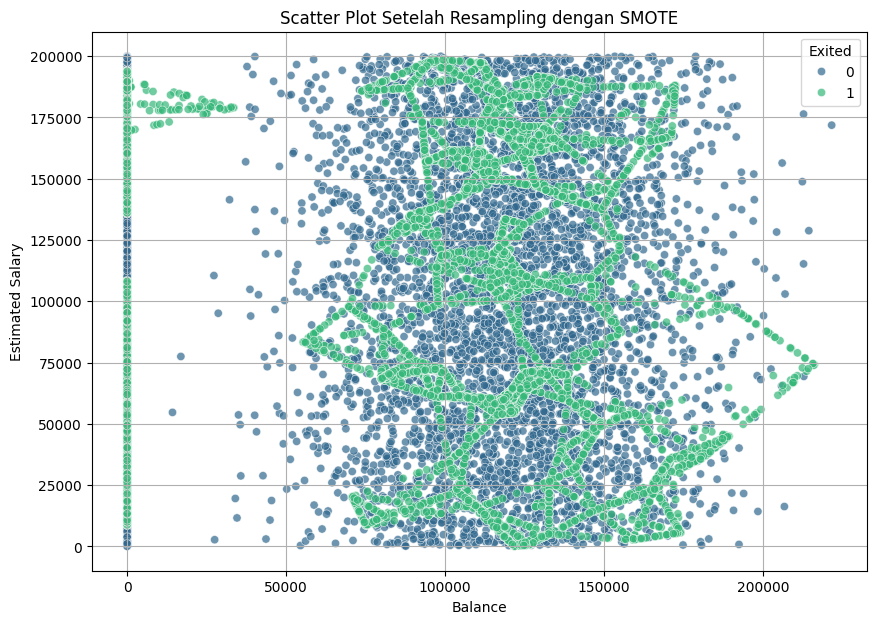

In [12]:
# Inisialisasi SMOTE
smote = SMOTE(k_neighbors=5, random_state=42)

# Terapkan SMOTE pada seluruh dataset (hanya untuk tujuan visualisasi)
X_smote, y_smote = smote.fit_resample(X, y)

print("Jumlah kelas sebelum SMOTE:", Counter(y))
print("Jumlah kelas setelah SMOTE:", Counter(y_smote))

# Visualisasi hasil SMOTE
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_smote['Balance'], y=X_smote['EstimatedSalary'], hue=y_smote, palette='viridis', alpha=0.7)
plt.title('Scatter Plot Setelah Resampling dengan SMOTE')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()

b) Terapkan metode oversampling yang lain yang berbeda dengan metode pada soal (2a). Visualisasikan scatter plot hasil resampling datasetnya

Jumlah kelas sebelum ADASYN: Counter({0: 7962, 1: 159})
Jumlah kelas setelah ADASYN: Counter({1: 7999, 0: 7962})


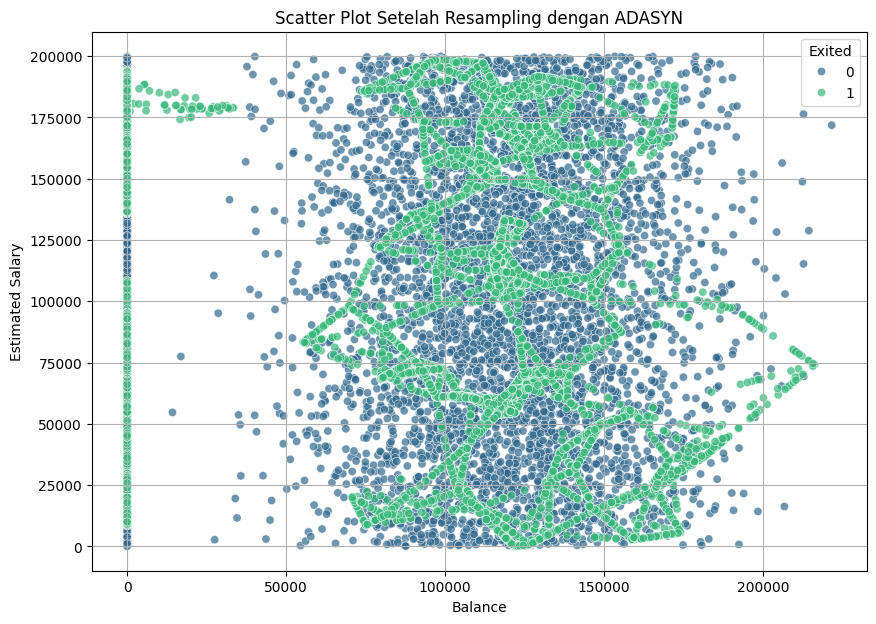

In [13]:
# Inisialisasi ADASYN
adasyn = ADASYN(n_neighbors=5, random_state=42)

# Terapkan ADASYN pada seluruh dataset (hanya untuk tujuan visualisasi)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

print("Jumlah kelas sebelum ADASYN:", Counter(y))
print("Jumlah kelas setelah ADASYN:", Counter(y_adasyn))

# Visualisasi hasil ADASYN
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_adasyn['Balance'], y=X_adasyn['EstimatedSalary'], hue=y_adasyn, palette='viridis', alpha=0.7)
plt.title('Scatter Plot Setelah Resampling dengan ADASYN')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()

c) Adakah perbedaan yang Anda temukan dari pengamatan terhadap data hasil kedua metode oversampling yang Anda pilih? Jika ada, jelaskan mengapa perbedaan tersebut bisa terjadi! Sertakan sumber referensi anda

Jawaban 2c, sepenglihatan saya terdapat beberapa perbedaan pada beberapa titik data, pada data yang dioversampling dengan SMOTE, data data baru (warna hijau) terlihat relatif seragam dan merata, sedangkan data yang dioversampling dengan ADASYN, data barunya tidak seragam dan terlihat terkonsentrasi dan padat pada beberapa titik data, sepembacaan saya ini terjadi karena SMOTE menghasilkan sampel sintetis secara seragam di seluruh ruang fitur, sementara ADASYN lebih menekankan pada pembuatan sampel sintetis di area yang klasifikasinya sulit, sehingga mengadaptasi oversampling berdasarkan tantangan spesifik dari dataset tersebut, artinya ADASYN menghasilkan lebih banyak sampel sintetis untuk titik dengan rasio kesulitan yang lebih tinggi, itulah alasan mengapa terdapat area yang sangat padat saat oversampling menggunakan ADASYN.

Sumber : [Medium](https://medium.com/@penpencil.blr/data-imbalance-how-is-adasyn-different-from-smote-f4eba54867ab)

d) Lakukan cross validation menggunakan StratifiedKFold dengan k=5 pada 2 buah model Decision Tree yang berbeda dengan ketentuan berikut:
- Model pertama menggunakan metode oversampling yang dipakai pada (2a)
- Model kedua menggunakan metode oversampling yang dipakai pada (2b)
- Metrik utama yang digunakan adalah f1 macro.
- Oversampling dilakukan pada setiap fold cross validation

Petunjuk: Anda bisa menggunakan cara 1d untuk menjawab soal ini.

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [14]:
# Model 1 Menggunakan SMOTE
print("="*40)
print("Evaluasi Model 1: Decision Tree dengan SMOTE")
print("="*40)
smote_sampler = SMOTE(random_state=42)
train_and_evaluate_with_oversampling(
    model=dt,
    X=X,
    y=y,
    resample_method=smote_sampler
)

print("\n" + "="*40)
print("Evaluasi Model 2: Decision Tree dengan ADASYN")
print("="*40)
# Model 2 Menggunakan ADASYN
adasyn_sampler = ADASYN(random_state=42)
train_and_evaluate_with_oversampling(
    model=dt,
    X=X,
    y=y,
    resample_method=adasyn_sampler
)

Evaluasi Model 1: Decision Tree dengan SMOTE
Mean scores across all folds:
Mean Accuracy: 0.7195
Mean F1-score (macro): 0.4388
Mean Precision (macro): 0.5020
Mean Recall (macro): 0.5208

Evaluasi Model 2: Decision Tree dengan ADASYN
Mean scores across all folds:
Mean Accuracy: 0.7094
Mean F1-score (macro): 0.4305
Mean Precision (macro): 0.4983
Mean Recall (macro): 0.4818


e) Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

Jawaban 2e, Decision tree dengan SMOTE yang memberikan F1 makro tertinggi, menurut asumsi saya, mungkin karena SMOTE menghasilkan data sintetis yang merata sedangkan ADASYN menghasilkan data sintetis yang terkadang tumpang tindih

## 3. Undersampling

a) Terapkan metode undersampling yang paling sesuai menurut anda dan bisa diterapkan dengan dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

Jumlah kelas sebelum RandomUnderSampler: Counter({0: 7962, 1: 159})
Jumlah kelas setelah RandomUnderSampler: Counter({0: 159, 1: 159})


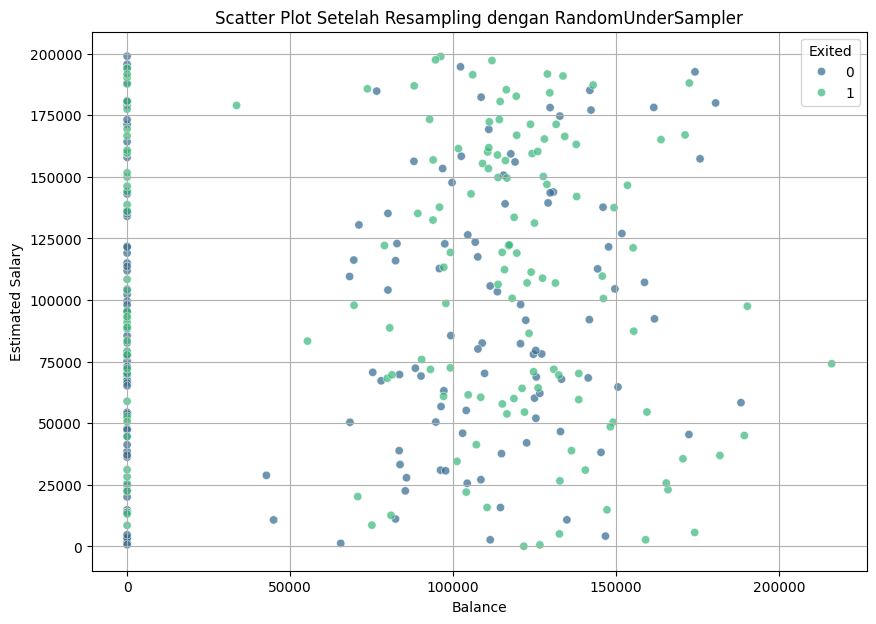

In [15]:
# Inisialisasi RandomUnderSampler
rus_resampler = RandomUnderSampler(random_state=42)

# Terapkan RUS pada seluruh dataset (hanya untuk tujuan visualisasi)
X_rus, y_rus = rus_resampler.fit_resample(X, y)

print("Jumlah kelas sebelum RandomUnderSampler:", Counter(y))
print("Jumlah kelas setelah RandomUnderSampler:", Counter(y_rus))

# Visualisasi hasil RandomUnderSampler
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_rus['Balance'], y=X_rus['EstimatedSalary'], hue=y_rus, palette='viridis', alpha=0.7)
plt.title('Scatter Plot Setelah Resampling dengan RandomUnderSampler')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()

b) Terapkan metode undersampling lain yang berbeda dengan metode pada soal (3a). Visualisasikan scatter plot hasil resampling datasetnya

Jumlah kelas sebelum NearMiss: Counter({0: 7962, 1: 159})
Jumlah kelas setelah NearMiss: Counter({0: 159, 1: 159})


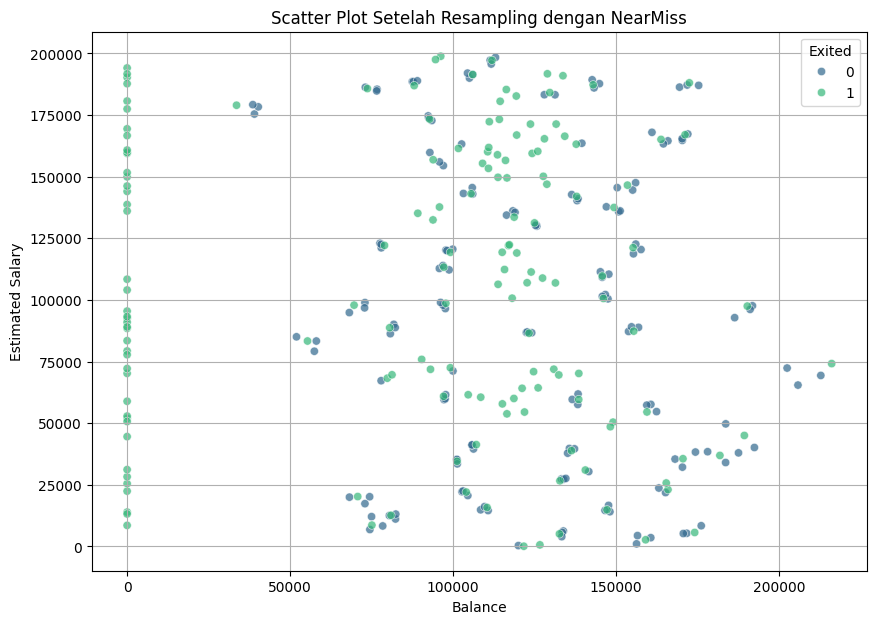

In [16]:
# Inisialisasi NearMiss (versi 1 adalah default)
nm = NearMiss(version=3)

# Terapkan NearMiss pada seluruh dataset (hanya untuk tujuan visualisasi)
X_nm, y_nm = nm.fit_resample(X, y)

print("Jumlah kelas sebelum NearMiss:", Counter(y))
print("Jumlah kelas setelah NearMiss:", Counter(y_nm))

# Visualisasi hasil NearMiss
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_nm['Balance'], y=X_nm['EstimatedSalary'], hue=y_nm, palette='viridis', alpha=0.7)
plt.title('Scatter Plot Setelah Resampling dengan NearMiss')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()

c) Berdasarkan visualisasi scatter plot kedua dataset hasil resampling pada soal (3a) dan (3b) yang Anda pilih, apa perbedaan yang terlihat? Jelaskan juga mengapa perbedaan tersebut bisa terjadi! Jangan lupa sertakan sumber referensi anda

Jawaban 3c, saya sendiri memilih resampling pada 3a atau Random Under Sampling, karena terlihat sebaran mayoritas nya lebih merata karena kelas mayoritas dihapus secara random, sedangkan saat menggunakan NearMiss dengan version 3, hasilnya adalah kebanyakan sampel mayoritas menjadi sedikit tumpang tindih dengan beberapa kelas minoritas, karena NearMiss version 3 bekerja dengan cara menyimpan contoh-contoh dari kelompok mayoritas yang paling jauh dari contoh-contoh lain dalam kelompoknya sendiri.

Sumber : [Medium](https://medium.com/data-science/oversampling-and-undersampling-explained-a-visual-guide-with-mini-2d-dataset-1155577d3091)

d) Lakukan cross validation menggunakan StratifiedKFold dengan k=5 pada 2 buah model Decision Tree yang berbeda dengan ketentuan berikut:
- Model pertama menerima dataset pada soal (3a)
- Model kedua menerima dataset pada soal (3b)
- Metrik utama yang digunakan adalah f1 macro.

In [25]:
# Model 1 Pipeline dengan NearMiss
pipeline_nm = Pipeline([
    ('undersampler', nm),
    ('classifier', dt)
])

# Lakukan cross-validation dan hitung skor f1_macro
scores_nm = cross_val_score(pipeline_nm, X, y, scoring='f1_macro', cv=cv)


# Model 2 Pipeline dengan RandomUnderSampler
pipeline_rus = Pipeline([
    ('undersampler', rus_resampler),
    ('classifier', dt)
])

# Lakukan cross-validation dan hitung skor f1_macro
scores_rus = cross_val_score(pipeline_rus, X, y, scoring='f1_macro', cv=cv)


# Menampilkan Hasil
print("="*45)
print("Hasil Cross Validation (F1 Macro Score)")
print("="*45)
print(f"Model dengan NearMiss           : {np.mean(scores_nm):.4f}")
print(f"Model dengan RandomUnderSampler : {np.mean(scores_rus):.4f}")

Hasil Cross Validation (F1 Macro Score)
Model dengan NearMiss           : 0.2723
Model dengan RandomUnderSampler : 0.3500


e) Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

Jawaban 3e, skor F1 Macro RandomUnderSampler merupakan yang tertinggi, menurut asumsi saya, ini terjadi karna data tersebar secara merata tanpa ada tumpang tindih yang memberikan kejelasan mengenai batas antar kelas. Sedangkan hasil dari NearMiss yaitu data yang dekat dengan kelas minoritas dipertahankan dan datanya sedikit padat pada area dekat kelas minoritas, yang membuat model kesulitan untuk mempelajari pola

## 4. Cost-Sensitive Learning

a) Buatlah beberapa model decision tree dengan random_state=42 yang menerima dataset soal (1a) dan dengan weight yang berbeda, yaiu:
- tanpa weights
- weights = {0: 1, 1: 2}
- weights = {0: 1, 1: 99}

Lakukan train_test_split dengan ketentuan berikut:
- menggunakan X dan y dari soal (1a)
- stratify=y
- random_state=42
- test_size=0.2

Kemudian, lakukan fit predict pada model dengan weights yang berbeda, kemudian tampilkan skor f1 macro dan juga confusion matrix untuk masing-masing model DT dengan weights yang berbeda tersebut. Berikan label pada Confusion matrix nya

Model 1: Tanpa Class Weight
Skor F1 Macro: 0.4906


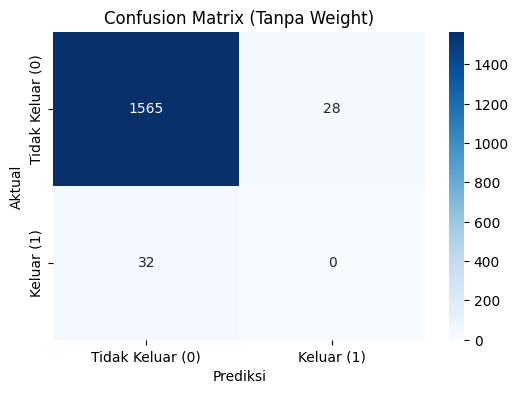


Model 2: Weight {0: 1, 1: 2}
Skor F1 Macro: 0.4901


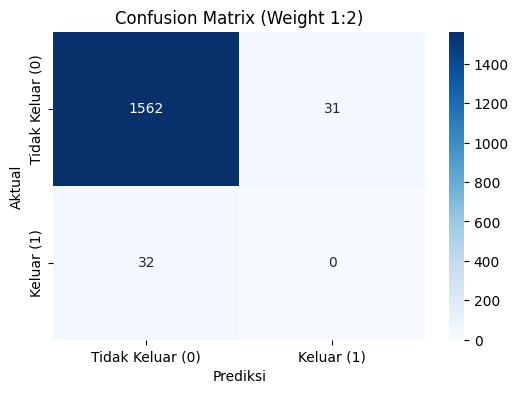


Model 3: Weight {0: 1, 1: 99}
Skor F1 Macro: 0.4895


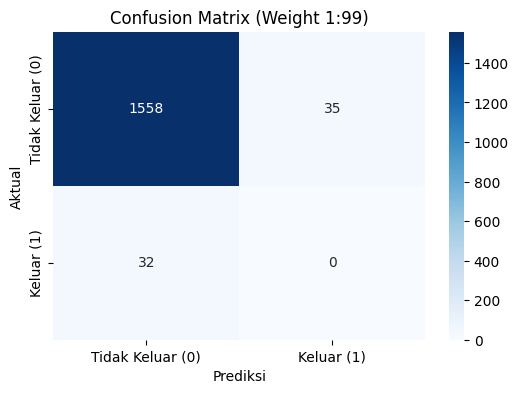

In [19]:
from sklearn.metrics import confusion_matrix

# Melakukan train_test_split dengan stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Fungsi bantuan untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Tidak Keluar (0)', 'Keluar (1)'],
                yticklabels=['Tidak Keluar (0)', 'Keluar (1)'])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(title)
    plt.show()

# Model Tanpa Weights
print("="*40)
print("Model 1: Tanpa Class Weight")
print("="*40)
dt_no_weight = DecisionTreeClassifier(random_state=42)
dt_no_weight.fit(X_train, y_train)
y_pred_no_weight = dt_no_weight.predict(X_test)

f1_no_weight = f1_score(y_test, y_pred_no_weight, average='macro')
print(f"Skor F1 Macro: {f1_no_weight:.4f}")
plot_confusion_matrix(y_test, y_pred_no_weight, 'Confusion Matrix (Tanpa Weight)')


# Model dengan weights = {0: 1, 1: 2}
print("\n" + "="*40)
print("Model 2: Weight {0: 1, 1: 2}")
print("="*40)
# Memberi bobot 2x lipat pada kelas minoritas (1)
dt_weight_2 = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 2})
dt_weight_2.fit(X_train, y_train)
y_pred_weight_2 = dt_weight_2.predict(X_test)

f1_weight_2 = f1_score(y_test, y_pred_weight_2, average='macro')
print(f"Skor F1 Macro: {f1_weight_2:.4f}")
plot_confusion_matrix(y_test, y_pred_weight_2, 'Confusion Matrix (Weight 1:2)')


# Model dengan weights = {0: 1, 1: 99}
print("\n" + "="*40)
print("Model 3: Weight {0: 1, 1: 99}")
print("="*40)
# Memberi bobot 99x lipat pada kelas minoritas (1)
dt_weight_99 = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 99})
dt_weight_99.fit(X_train, y_train)
y_pred_weight_99 = dt_weight_99.predict(X_test)

f1_weight_99 = f1_score(y_test, y_pred_weight_99, average='macro')
print(f"Skor F1 Macro: {f1_weight_99:.4f}")
plot_confusion_matrix(y_test, y_pred_weight_99, 'Confusion Matrix (Weight 1:99)')

b) Berdasarkan jawaban pada soal (4a), Apakah terdapat perbedaan pada confusion matrix dan score f1 macro masing-masing weights? Jelaskan.

Jawaban 4b, Ya, skor F1 Macro pada decision tree tanpa weight memiliki skor yang sangat tinggi, artinya pemberian bobot yang berbeda tidak memberikan solusi atas permasalahan imbalanced dataset, jadi lebih baik fokus pada membenahi dataset dibanding dengan experiment dengan model, karena selama saya belajar selama ini, datalah yang menjadi hal yang krusial dalam pengembangan model machine learning, karena algoritma secanggih apapun jika datanya jelek, maka hasil modelnya pun akan jelek

## 5. Neural Network dan Pipeline

a) Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 3 hidden layer dengan masing - masing layer terdiri dari 50, 40, dan 20 berturut - turut
- Menggunakan random_state=42
- Abaikan hyperparameter lain

In [20]:
# Model MLP pertama
mlp_model_a = MLPClassifier(
    hidden_layer_sizes=(50, 40, 20),
    random_state=42
)

print("Model MLP (a) berhasil dibuat:")
print(mlp_model_a)

Model MLP (a) berhasil dibuat:
MLPClassifier(hidden_layer_sizes=(50, 40, 20), random_state=42)


b) Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 2 hidden layer dengan masing - masing layer terdiri dari 100 dan 80 berturut - turut
- Menggunakan random_state=42
- Abaikan hyperparameter lain

In [21]:
# Model MLP kedua
mlp_model_b = MLPClassifier(
    hidden_layer_sizes=(100, 80),
    random_state=42
)

print("\nModel MLP (b) berhasil dibuat:")
print(mlp_model_b)


Model MLP (b) berhasil dibuat:
MLPClassifier(hidden_layer_sizes=(100, 80), random_state=42)


c) Lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 terhadap kedua model MLP pada soal (5a) dan (5b) memakai X dan y yang didefinisikan pada soal (1a). Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [22]:
# Evaluasi Model (a)
f1_macro_a = cross_val_score(mlp_model_a, X, y, cv=cv, scoring='f1_macro')
f1_micro_a = cross_val_score(mlp_model_a, X, y, cv=cv, scoring='f1_micro')

# Evaluasi Model (b)
f1_macro_b = cross_val_score(mlp_model_b, X, y, cv=cv, scoring='f1_macro')
f1_micro_b = cross_val_score(mlp_model_b, X, y, cv=cv, scoring='f1_micro')

# Menampilkan Hasil
print("="*45)
print("Hasil Cross Validation Model MLP")
print("="*45)
print("\nModel (a) - Arsitektur (50, 40, 20):")
print(f"  Rata-rata F1 Macro: {np.mean(f1_macro_a):.4f}")
print(f"  Rata-rata F1 Micro: {np.mean(f1_micro_a):.4f}")

print("\nModel (b) - Arsitektur (100, 80):")
print(f"  Rata-rata F1 Macro: {np.mean(f1_macro_b):.4f}")
print(f"  Rata-rata F1 Micro: {np.mean(f1_micro_b):.4f}")

Hasil Cross Validation Model MLP

Model (a) - Arsitektur (50, 40, 20):
  Rata-rata F1 Macro: 0.4943
  Rata-rata F1 Micro: 0.9775

Model (b) - Arsitektur (100, 80):
  Rata-rata F1 Macro: 0.4915
  Rata-rata F1 Micro: 0.9628


d) Apakah terdapat perbedaan skor metrik makro evaluasi model pada soal (5c)? Jelaskan keterkaitan perbedaan skor dengan perbedaan hyperparameter kedua model!

Jawaban 5d, Ya, model a yang memiliki 3 hidden layer, memiliki hasil yang lebih baik pada kedua metrik dibanding model b yang memiliki 2 hidden layer. Menurut asumsi saya, model yang memiliki hidden layer yang lebih dalam memberikan kemampuan lebih untuk mempelajari pola dari data, walaupun total neuronnya lebih sedikit dibanding layer yang lebih sedikit

e) Dengan menggunakan Pipeline, lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 pada sebuah pipeline yang berisi steps yaitu oversampling menggunakan SMOTE dengan random_state=42 dan menggunakan model MLP yang memiliki performa lebih bagus dari soal (5a) dan (5b). Gunakan X dan y yang didefinisikan pada soal (1a) untuk melakukan cross validation. Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [23]:
# Buat pipeline dengan SMOTE dan model MLP terbaik
pipeline_smote = Pipeline([
    ('oversampler', smote_sampler),
    ('classifier', mlp_model_a)
])

# Lakukan cross-validation pada pipeline
f1_macro_smote = cross_val_score(pipeline_smote, X, y, cv=cv, scoring='f1_macro')
f1_micro_smote = cross_val_score(pipeline_smote, X, y, cv=cv, scoring='f1_micro')

print("="*50)
print("Hasil Cross Validation Pipeline (SMOTE + MLP)")
print("="*50)
print(f"  Rata-rata F1 Macro: {np.mean(f1_macro_smote):.4f}")
print(f"  Rata-rata F1 Micro: {np.mean(f1_micro_smote):.4f}")

Hasil Cross Validation Pipeline (SMOTE + MLP)
  Rata-rata F1 Macro: 0.1841
  Rata-rata F1 Micro: 0.2513


f) Dengan menggunakan Pipeline, lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 pada sebuah pipeline yang berisi steps yaitu undersampling menggunakan RandomUnderSampler dengan random_state=42 dan menggunakan model MLP yang memiliki performa lebih bagus dari soal (5a) dan (5b). Gunakan X dan y yang didefinisikan pada soal (1a) untuk melakukan cross validation. Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [24]:
# Buat pipeline dengan RandomUnderSampler dan model MLP terbaik
pipeline_rus = Pipeline([
    ('undersampler', rus_resampler),
    ('classifier', mlp_model_a)
])

# Lakukan cross-validation pada pipeline
f1_macro_rus = cross_val_score(pipeline_rus, X, y, cv=cv, scoring='f1_macro')
f1_micro_rus = cross_val_score(pipeline_rus, X, y, cv=cv, scoring='f1_micro')

print("\n" + "="*50)
print("Hasil Cross Validation Pipeline (RUS + MLP)")
print("="*50)
print(f"  Rata-rata F1 Macro: {np.mean(f1_macro_rus):.4f}")
print(f"  Rata-rata F1 Micro: {np.mean(f1_micro_rus):.4f}")


Hasil Cross Validation Pipeline (RUS + MLP)
  Rata-rata F1 Macro: 0.2971
  Rata-rata F1 Micro: 0.4364


## 6. Soal Teoritis Neural Network

a) Apabila dalam binary classification dibutuhkan 1 neuron dalam output layer, berapa neuron yang dibutuhkan dalam output layer untuk multiclass classification? Berikan contoh dan sertakan sumber referensi yang kalian gunakan.

Jawaban 6a, Untuk jumlah neuron dalam output layer multiclass classification itu mengikuti jumlah dari class yang ada, jika terdapat 10 class dari sebuah dataset, maka neuronnya pun haruslah 10, karena model nantikan akan memprediksi 10 kelas tersebut, begitupun dengan contoh lainnya.

Sumber : [Atmosera](https://www.atmosera.com/blog/multiclass-classification-with-neural-networks/)

b) Diketahui terdapat hyperparameter berikut pada MLPClassifier:
- hidden_layer_sizes
- learning_rate_init

Untuk masing-masing hyperparameter tersebut, jelaskan apa yang akan terjadi jika kita menetapkan value yang berbeda (misalnya menjelaskan perbedaan hidden_layer_size=(50,50) vs (100,50), dsb.). Asumsikan hyperparameter learning_rate yang dipakai adalah constant.

Sertakan sumber referensi anda.

Jawaban 6b, Pada intinya jika jumlah neuron yang dipilih terlalu sedikit, hal ini akan menyebabkan underfitting dan bias statistik yang tinggi. Sedangkan jika kita memilih terlalu banyak neuron, hal ini dapat menyebabkan overfitting, varians tinggi, dan memperpanjang waktu yang dibutuhkan untuk melatih jaringan. Karena itulah dibutuhkan experiment untuk menentukan berapa jumlah neuron pada hidden layer yang optimal untuk studi kasus tertentu.

Sumber : [Medium](https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3)